In [36]:
library(Seurat)  #ver 2.3.4
library(dplyr)  #ver 0.8.1
library(gridExtra)  #v2.3
library(data.table)  #v1.13.2

In [37]:
#import 10x matrix and sample metadata
sl_count_matrix <- read.delim(file = "data/GSE134912_spongilla_10x_count_matrix.txt")
sampleID_metadata <- read.delim(file = "data/sample_ID_metadata.tsv", stringsAsFactors = F)


In [38]:
sl_count_dgCmatrix <- as(as.matrix(sl_count_matrix), "dgCMatrix")
sl_count_dgCmatrix[1:5,1:5]
colnames(sl_count_dgCmatrix) <- gsub("\\.", "-", colnames(sl_count_dgCmatrix))
rownames(sampleID_metadata) <- gsub("\\.", "-", rownames(sampleID_metadata))
head(rownames(sampleID_metadata))
sl_count_dgCmatrix[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
        AAACCTGAGCTGCCCA.1 AAACCTGAGGCCGAAT.1 AAACCTGCAACACCCG.1
c55_g1                   .                  .                  .
c69_g1                   .                  .                  .
c73_g1                   .                  .                  .
c77_g1                   .                  .                  .
c104_g1                  .                  .                  .
        AAACCTGCACGAGAGT.1 AAACCTGCAGACTCGC.1
c55_g1                   .                  .
c69_g1                   .                  .
c73_g1                   .                  .
c77_g1                   .                  .
c104_g1                  .                  .

[1] "AAACCTGAGCTGCCCA-1" "AAACCTGAGGCCGAAT-1" "AAACCTGCAACACCCG-1"
[4] "AAACCTGCACGAGAGT-1" "AAACCTGCAGACTCGC-1" "AAACCTGCAGTCGTGC-1"

5 x 5 sparse Matrix of class "dgCMatrix"
        AAACCTGAGCTGCCCA-1 AAACCTGAGGCCGAAT-1 AAACCTGCAACACCCG-1
c55_g1                   .                  .                  .
c69_g1                   .                  .                  .
c73_g1                   .                  .                  .
c77_g1                   .                  .                  .
c104_g1                  .                  .                  .
        AAACCTGCACGAGAGT-1 AAACCTGCAGACTCGC-1
c55_g1                   .                  .
c69_g1                   .                  .
c73_g1                   .                  .
c77_g1                   .                  .
c104_g1                  .                  .

In [39]:
#gene names are trimmed to 110 characters for purposes of plotting
rownames(sl_count_dgCmatrix) <- strtrim(rownames(sl_count_dgCmatrix), width = 110)

In [40]:
#initialize seurat object
sl <- CreateSeuratObject(counts = sl_count_dgCmatrix, project = "spongilla_sc")
head(sl@meta.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”


orig.ident   nCount_RNA nFeature_RNA
AAACCTGAGCTGCCCA-1 spongilla_sc 13899      3405        
AAACCTGAGGCCGAAT-1 spongilla_sc 27640      4994        
AAACCTGCAACACCCG-1 spongilla_sc 14762      3629        
AAACCTGCACGAGAGT-1 spongilla_sc 16822      3842        
AAACCTGCAGACTCGC-1 spongilla_sc  7942      2382        
AAACCTGCAGTCGTGC-1 spongilla_sc 11762      3038

In [42]:
better.metadata <- fread("./data/spongilla_cell_metadata.tsv", header = TRUE)
sl@meta.data <- as.data.frame(better.metadata, row.names = better.metadata$cell)
sl <- AddMetaData(sl, metadata = sampleID_metadata)
head(sl@meta.data)

cell               orig.ident       nCount_RNA nFeature_RNA
AAACCTGAGCTGCCCA-1 AAACCTGAGCTGCCCA-1 spongilla_1_8day 13901      3407        
AAACCTGAGGCCGAAT-1 AAACCTGAGGCCGAAT-1 spongilla_1_8day 27645      4998        
AAACCTGCAACACCCG-1 AAACCTGCAACACCCG-1 spongilla_1_8day 14765      3631        
AAACCTGCACGAGAGT-1 AAACCTGCACGAGAGT-1 spongilla_1_8day 16827      3847        
AAACCTGCAGACTCGC-1 AAACCTGCAGACTCGC-1 spongilla_1_8day  7943      2385        
AAACCTGCAGTCGTGC-1 AAACCTGCAGTCGTGC-1 spongilla_1_8day 11763      3039        
                   clusterID cell_type        cell_type_abbreviation
AAACCTGAGCTGCCCA-1  1        Archaeocytes     Arc                   
AAACCTGAGGCCGAAT-1 13        13               13                    
AAACCTGCAACACCCG-1  4        Myopeptidocytes1 Myp1                  
AAACCTGCACGAGAGT-1 29        29               29                    
AAACCTGCAGACTCGC-1 15        15               15                    
AAACCTGCAGTCGTGC-1 11        Apopylar Cells   Apo                   
                   cell_type_family          SampleID
AAACCTGAGCTGCCCA-1 Archeocytes and relatives 1       
AAACCTGAGGCCGAAT-1 transitional              1       
AAACCTGCAACACCCG-1 Peptidocytes              1       
AAACCTGCACGAGAGT-1 transitional              1       
AAACCTGCAGACTCGC-1 transitional              1       
AAACCTGCAGTCGTGC-1 Peptidocytes              1

In [43]:
sl
head(sl@meta.data)

An object of class Seurat 
26157 features across 10106 samples within 1 assay 
Active assay: RNA (26157 features, 0 variable features)
 1 layer present: counts

cell               orig.ident       nCount_RNA nFeature_RNA
AAACCTGAGCTGCCCA-1 AAACCTGAGCTGCCCA-1 spongilla_1_8day 13901      3407        
AAACCTGAGGCCGAAT-1 AAACCTGAGGCCGAAT-1 spongilla_1_8day 27645      4998        
AAACCTGCAACACCCG-1 AAACCTGCAACACCCG-1 spongilla_1_8day 14765      3631        
AAACCTGCACGAGAGT-1 AAACCTGCACGAGAGT-1 spongilla_1_8day 16827      3847        
AAACCTGCAGACTCGC-1 AAACCTGCAGACTCGC-1 spongilla_1_8day  7943      2385        
AAACCTGCAGTCGTGC-1 AAACCTGCAGTCGTGC-1 spongilla_1_8day 11763      3039        
                   clusterID cell_type        cell_type_abbreviation
AAACCTGAGCTGCCCA-1  1        Archaeocytes     Arc                   
AAACCTGAGGCCGAAT-1 13        13               13                    
AAACCTGCAACACCCG-1  4        Myopeptidocytes1 Myp1                  
AAACCTGCACGAGAGT-1 29        29               29                    
AAACCTGCAGACTCGC-1 15        15               15                    
AAACCTGCAGTCGTGC-1 11        Apopylar Cells   Apo                   
                   cell_type_family          SampleID
AAACCTGAGCTGCCCA-1 Archeocytes and relatives 1       
AAACCTGAGGCCGAAT-1 transitional              1       
AAACCTGCAACACCCG-1 Peptidocytes              1       
AAACCTGCACGAGAGT-1 transitional              1       
AAACCTGCAGACTCGC-1 transitional              1       
AAACCTGCAGTCGTGC-1 Peptidocytes              1

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


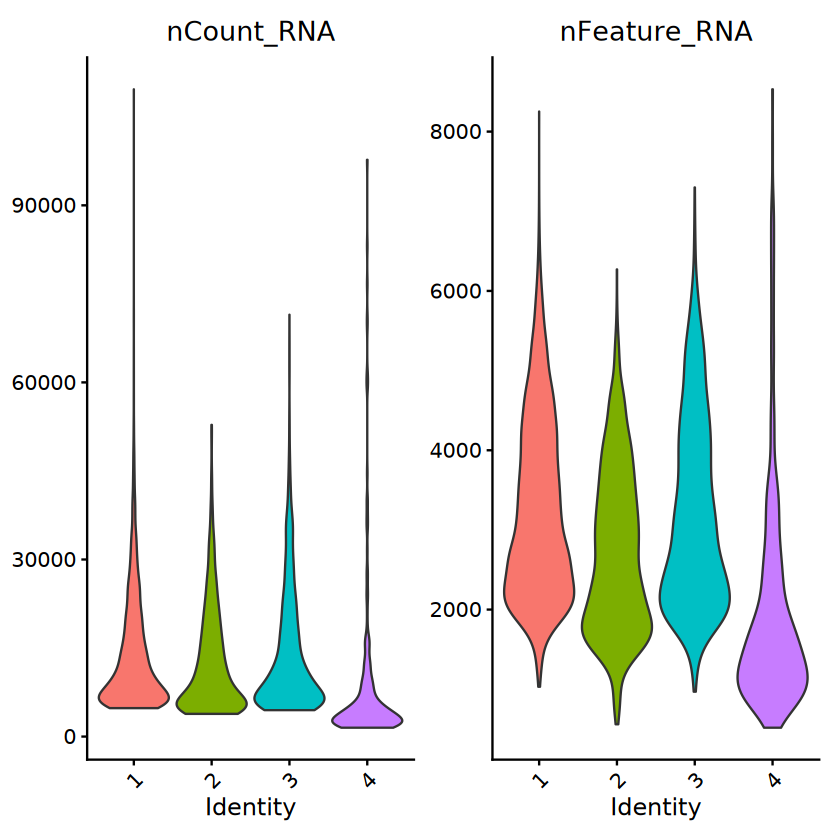

In [49]:
VlnPlot(sl, features = c("nCount_RNA", "nFeature_RNA"), ncol = 2, group.by = "SampleID", pt.size = 0)

In [50]:
sl <- NormalizeData(sl)

Normalizing layer: counts



In [51]:
sl <- FindVariableFeatures(sl, selection.method = "vst", nfeatures = 3000)

Finding variable features for layer counts



When using repel, set xnudge and ynudge to 0 for optimal results



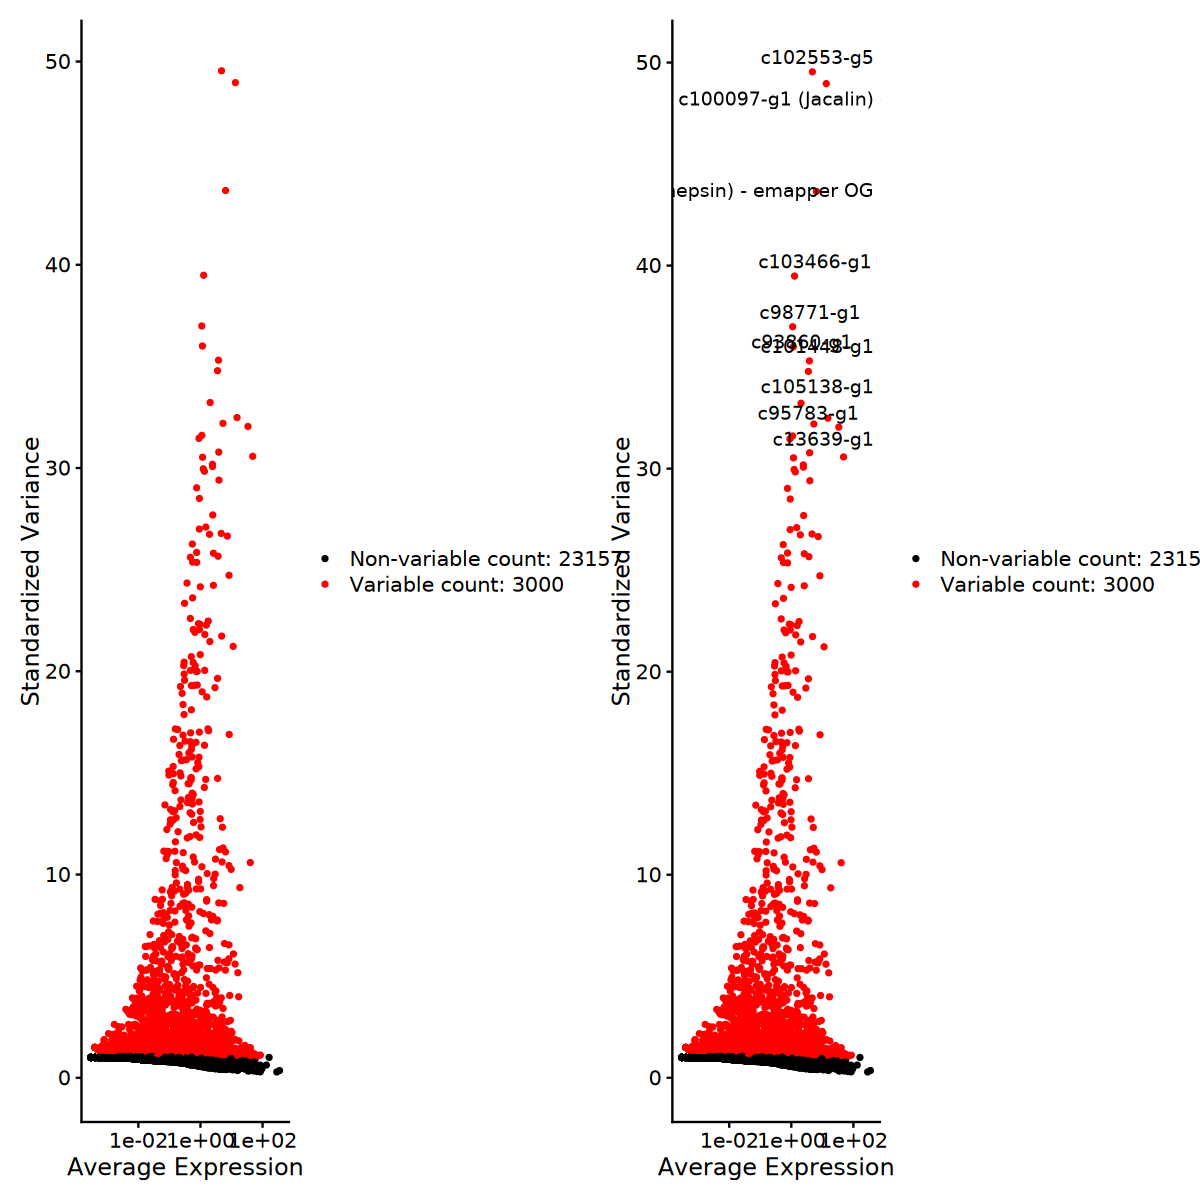

In [54]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(sl), 10)
options(repr.plot.height=10, repr.plot.width=10)
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(sl)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2


In [58]:
sl <- ScaleData(sl)

Centering and scaling data matrix



In [59]:
sl <- RunPCA(sl, features = VariableFeatures(object = sl))

PC_ 1 
Positive:  c79489-g1 SRF (serum response factor (c-fos serum response element-binding transcription factor)) - emapper OG, c93667-g1, c85861-g1 1-to-2 MSI1,MSI2 musashi RNA binding protein 1, c80151-g1, c67184-g1, c101470-g1, c98431-g1, c94398-g1 (methionine sulfoxide reductase) - emapper OG, c92277-g1, c98233-g1 MSRA (Has an important function as a repair enzyme for proteins that have been inactivated by oxidat 
	   c97660-g1 NXN (nucleoredoxin-like) - emapper OG, c94792-g1, c101879-g1, c104552-g2, c95066-g1, c102099-g2, c104654-g2, c102194-g1, c79497-g1 1-to-1 CYBA cytochrome b-245 alpha chain, c80955-g1 1-to-6 HIST1H4J,HIST1H4B,HIST4H4,HIST1H4A... histone cluster 1 H4 family member j 
	   c103957-g1 OSI-22282 (ring finger and FYVE-like domain containing E3 ubiquitin protein ligase) - emapper OG, c101747-g1, c110915-g1, c101019-g1, c104290-g2 (Inherit from COG: epimerase dehydratase) - emapper OG, c103578-g2 5-to-1 NMRAL1 NmrA like redox sensor 1, c101860-g2, c104421-g2 (Inher

In [75]:
sort(Loadings(sl)[,"PC_1"], decreasing = TRUE)[1:5]

c79489-g1 SRF (serum response factor (c-fos serum response element-binding transcription factor)) - emapper OG 
                                                                                                    0.04374618 
                                                                                                     c93667-g1 
                                                                                                    0.04070459 
                                                      c85861-g1 1-to-2 MSI1,MSI2 musashi RNA binding protein 1 
                                                                                                    0.04038116 
                                                                                                     c80151-g1 
                                                                                                    0.03761232 
                                                                                                     c67184-g1 
                                                                                                    0.03665455

In [79]:
head(sl@meta.data)

cell               orig.ident       nCount_RNA nFeature_RNA
AAACCTGAGCTGCCCA-1 AAACCTGAGCTGCCCA-1 spongilla_1_8day 13899      3405        
AAACCTGAGGCCGAAT-1 AAACCTGAGGCCGAAT-1 spongilla_1_8day 27640      4994        
AAACCTGCAACACCCG-1 AAACCTGCAACACCCG-1 spongilla_1_8day 14762      3629        
AAACCTGCACGAGAGT-1 AAACCTGCACGAGAGT-1 spongilla_1_8day 16822      3842        
AAACCTGCAGACTCGC-1 AAACCTGCAGACTCGC-1 spongilla_1_8day  7942      2382        
AAACCTGCAGTCGTGC-1 AAACCTGCAGTCGTGC-1 spongilla_1_8day 11762      3038        
                   clusterID cell_type        cell_type_abbreviation
AAACCTGAGCTGCCCA-1  1        Archaeocytes     Arc                   
AAACCTGAGGCCGAAT-1 13        13               13                    
AAACCTGCAACACCCG-1  4        Myopeptidocytes1 Myp1                  
AAACCTGCACGAGAGT-1 29        29               29                    
AAACCTGCAGACTCGC-1 15        15               15                    
AAACCTGCAGTCGTGC-1 11        Apopylar Cells   Apo                   
                   cell_type_family          SampleID
AAACCTGAGCTGCCCA-1 Archeocytes and relatives 1       
AAACCTGAGGCCGAAT-1 transitional              1       
AAACCTGCAACACCCG-1 Peptidocytes              1       
AAACCTGCACGAGAGT-1 transitional              1       
AAACCTGCAGACTCGC-1 transitional              1       
AAACCTGCAGTCGTGC-1 Peptidocytes              1

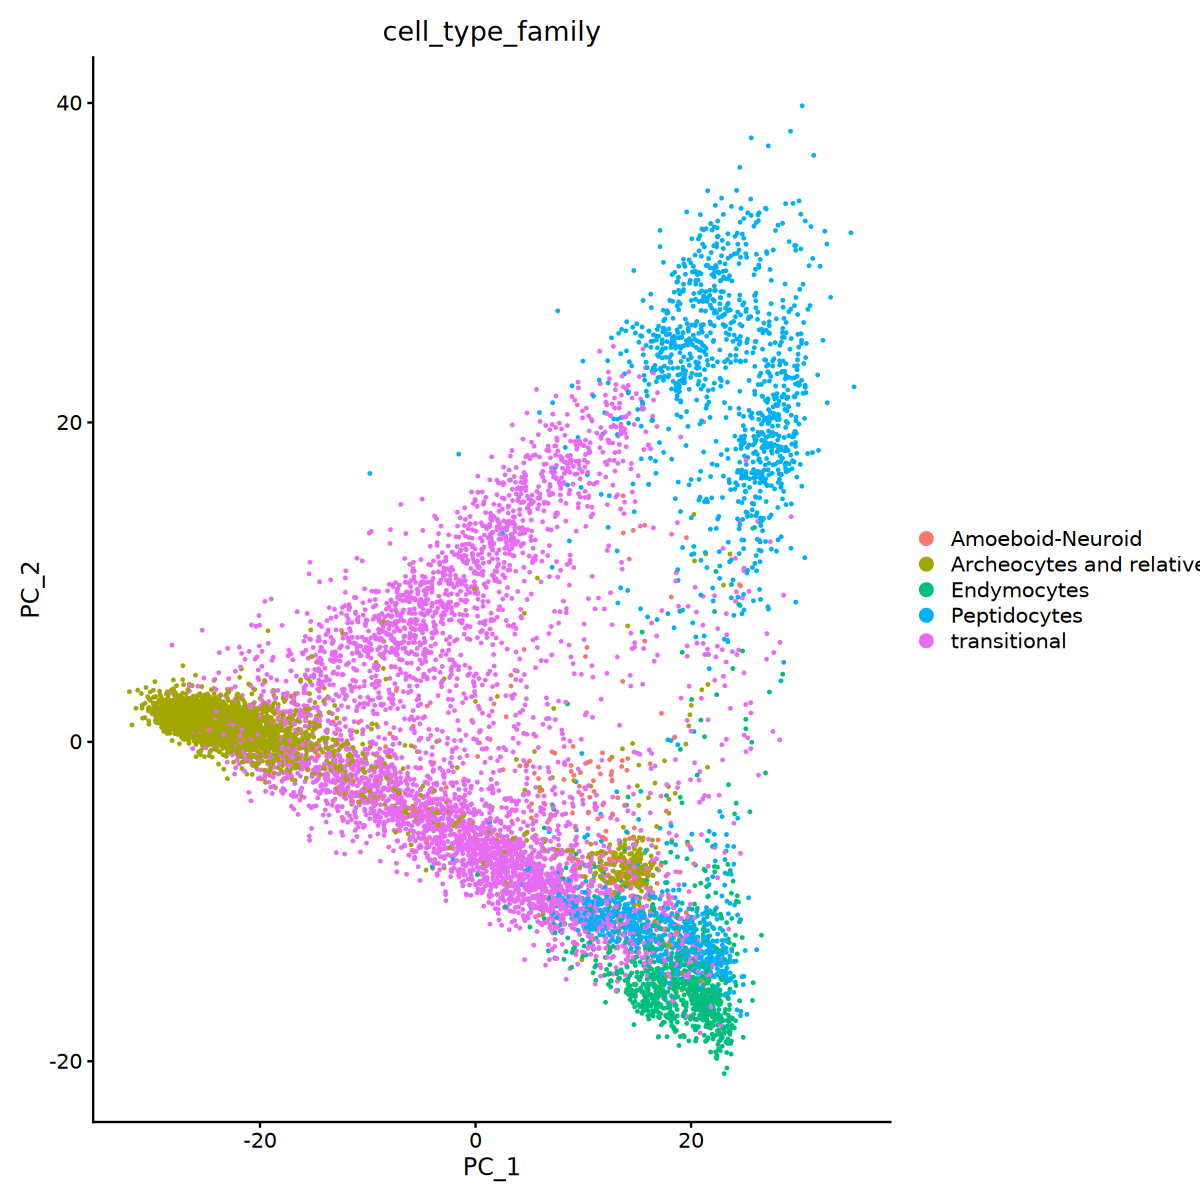

In [88]:
options(repr.plot.height=10, repr.plot.width=10)
DimPlot(sl, reduction = "pca", group.by=c("cell_type_family"), dims = 1:2) 

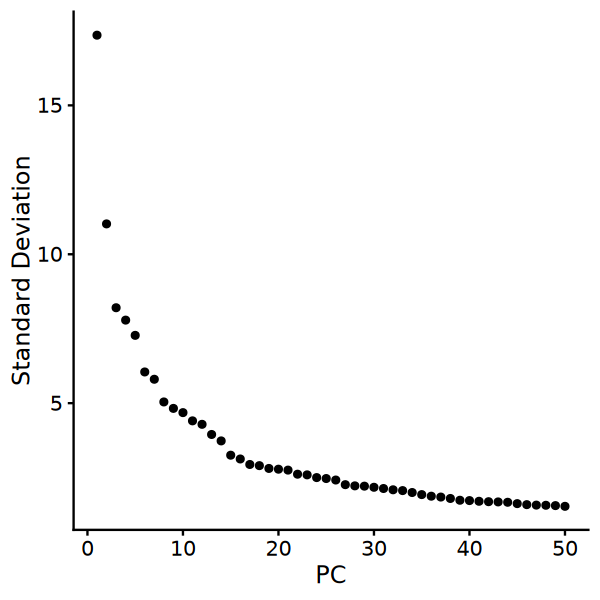

In [93]:
options(repr.plot.height=5, repr.plot.width=5)
ElbowPlot(sl, ndims = 50)

In [97]:
dims.use = 1:40
sl <- RunTSNE(object = sl, dims = dims.use, do.fast = TRUE)
sl <- RunUMAP(object = sl, dims = dims.use)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:14:42 UMAP embedding parameters a = 0.9922 b = 1.112

15:14:42 Read 10106 rows and found 40 numeric columns

15:14:42 Using Annoy for neighbor search, n_neighbors = 30

15:14:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:14:44 Writing NN index file to temp file /tmp/RtmpbCQNia/file212c3292bab6c

15:14:44 Searching Annoy index using 1 thread, search_k = 3000

15:14:46 Annoy recall = 100%

15:14:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [104]:
sl <- FindNeighbors(object = sl,dims = dims.use)

Computing nearest neighbor graph

Computing SNN



In [115]:
sl <- FindClusters(sl, resolution = 10, algorithm = 4, random.seed = 1)
sl <- FindClusters(sl, resolution = 1, algorithm = 4, random.seed = 1)
sl <- FindClusters(sl, resolution = 0.5, algorithm = 4, random.seed = 1)
sl <- FindClusters(sl, resolution = 0.2, algorithm = 4, random.seed = 1)

In [116]:
sl
head(sl@meta.data)

An object of class Seurat 
26157 features across 10106 samples within 1 assay 
Active assay: RNA (26157 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, tsne, umap

cell               orig.ident       nCount_RNA nFeature_RNA
AAACCTGAGCTGCCCA-1 AAACCTGAGCTGCCCA-1 spongilla_1_8day 13899      3405        
AAACCTGAGGCCGAAT-1 AAACCTGAGGCCGAAT-1 spongilla_1_8day 27640      4994        
AAACCTGCAACACCCG-1 AAACCTGCAACACCCG-1 spongilla_1_8day 14762      3629        
AAACCTGCACGAGAGT-1 AAACCTGCACGAGAGT-1 spongilla_1_8day 16822      3842        
AAACCTGCAGACTCGC-1 AAACCTGCAGACTCGC-1 spongilla_1_8day  7942      2382        
AAACCTGCAGTCGTGC-1 AAACCTGCAGTCGTGC-1 spongilla_1_8day 11762      3038        
                   clusterID cell_type        cell_type_abbreviation
AAACCTGAGCTGCCCA-1  1        Archaeocytes     Arc                   
AAACCTGAGGCCGAAT-1 13        13               13                    
AAACCTGCAACACCCG-1  4        Myopeptidocytes1 Myp1                  
AAACCTGCACGAGAGT-1 29        29               29                    
AAACCTGCAGACTCGC-1 15        15               15                    
AAACCTGCAGTCGTGC-1 11        Apopylar Cells   Apo                   
                   cell_type_family          SampleID RNA_snn_res.10
AAACCTGAGCTGCCCA-1 Archeocytes and relatives 1        48            
AAACCTGAGGCCGAAT-1 transitional              1        32            
AAACCTGCAACACCCG-1 Peptidocytes              1        13            
AAACCTGCACGAGAGT-1 transitional              1        11            
AAACCTGCAGACTCGC-1 transitional              1        7             
AAACCTGCAGTCGTGC-1 Peptidocytes              1        4             
                   seurat_clusters RNA_snn_res.1 RNA_snn_res.0.5
AAACCTGAGCTGCCCA-1 1               1             1              
AAACCTGAGGCCGAAT-1 3               2             3              
AAACCTGCAACACCCG-1 2               4             4              
AAACCTGCACGAGAGT-1 1               12            1              
AAACCTGCAGACTCGC-1 3               2             3              
AAACCTGCAGTCGTGC-1 5               10            9              
                   RNA_snn_res.0.2
AAACCTGAGCTGCCCA-1 1              
AAACCTGAGGCCGAAT-1 3              
AAACCTGCAACACCCG-1 2              
AAACCTGCACGAGAGT-1 1              
AAACCTGCAGACTCGC-1 3              
AAACCTGCAGTCGTGC-1 5

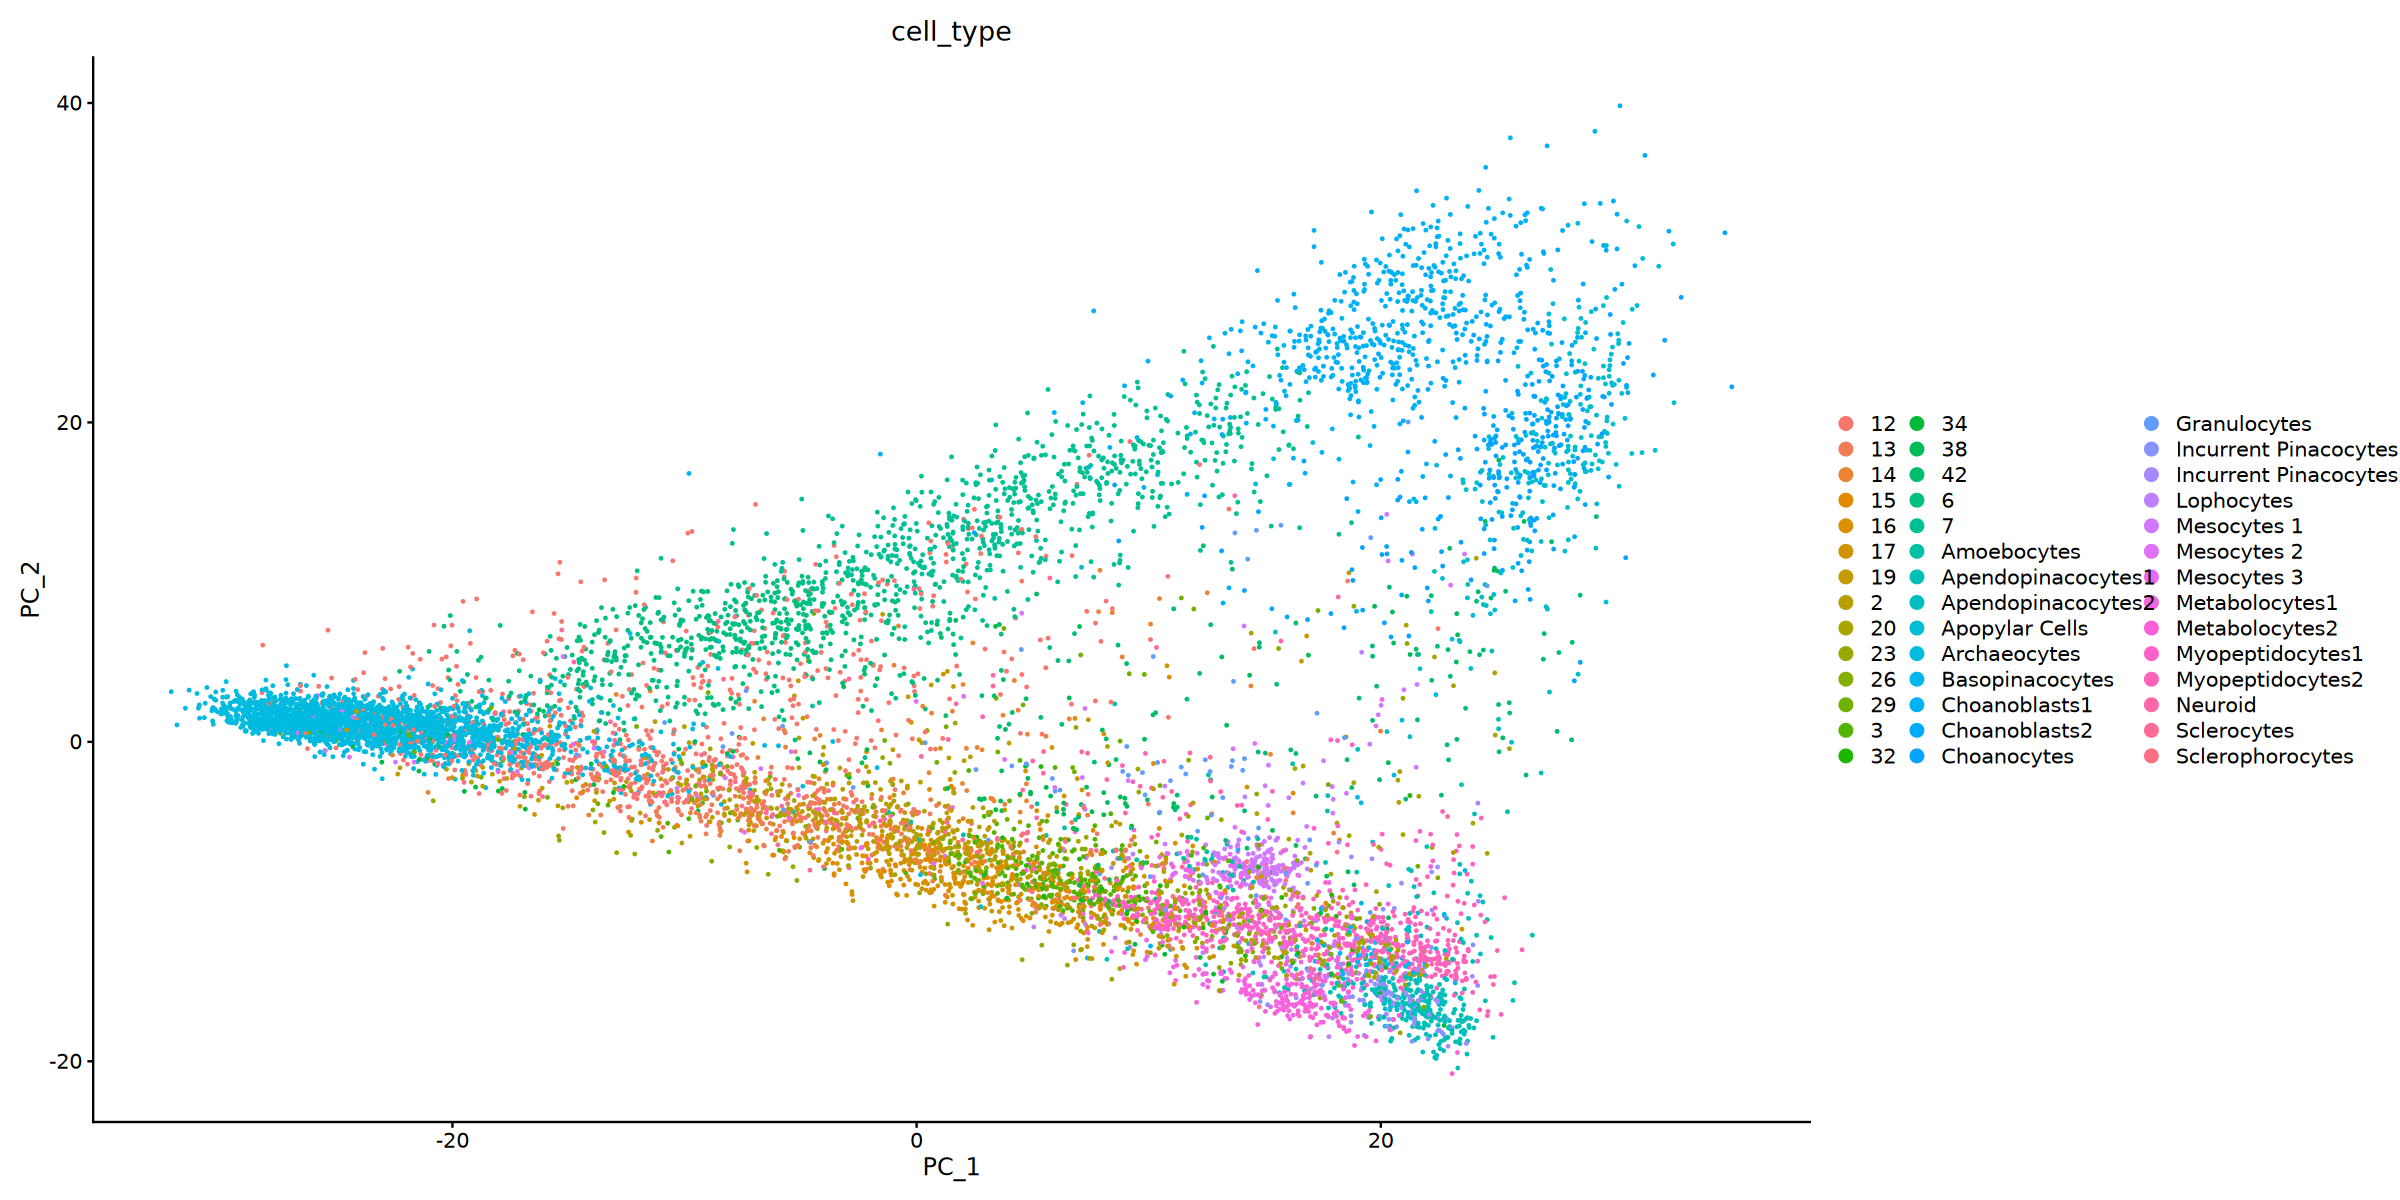

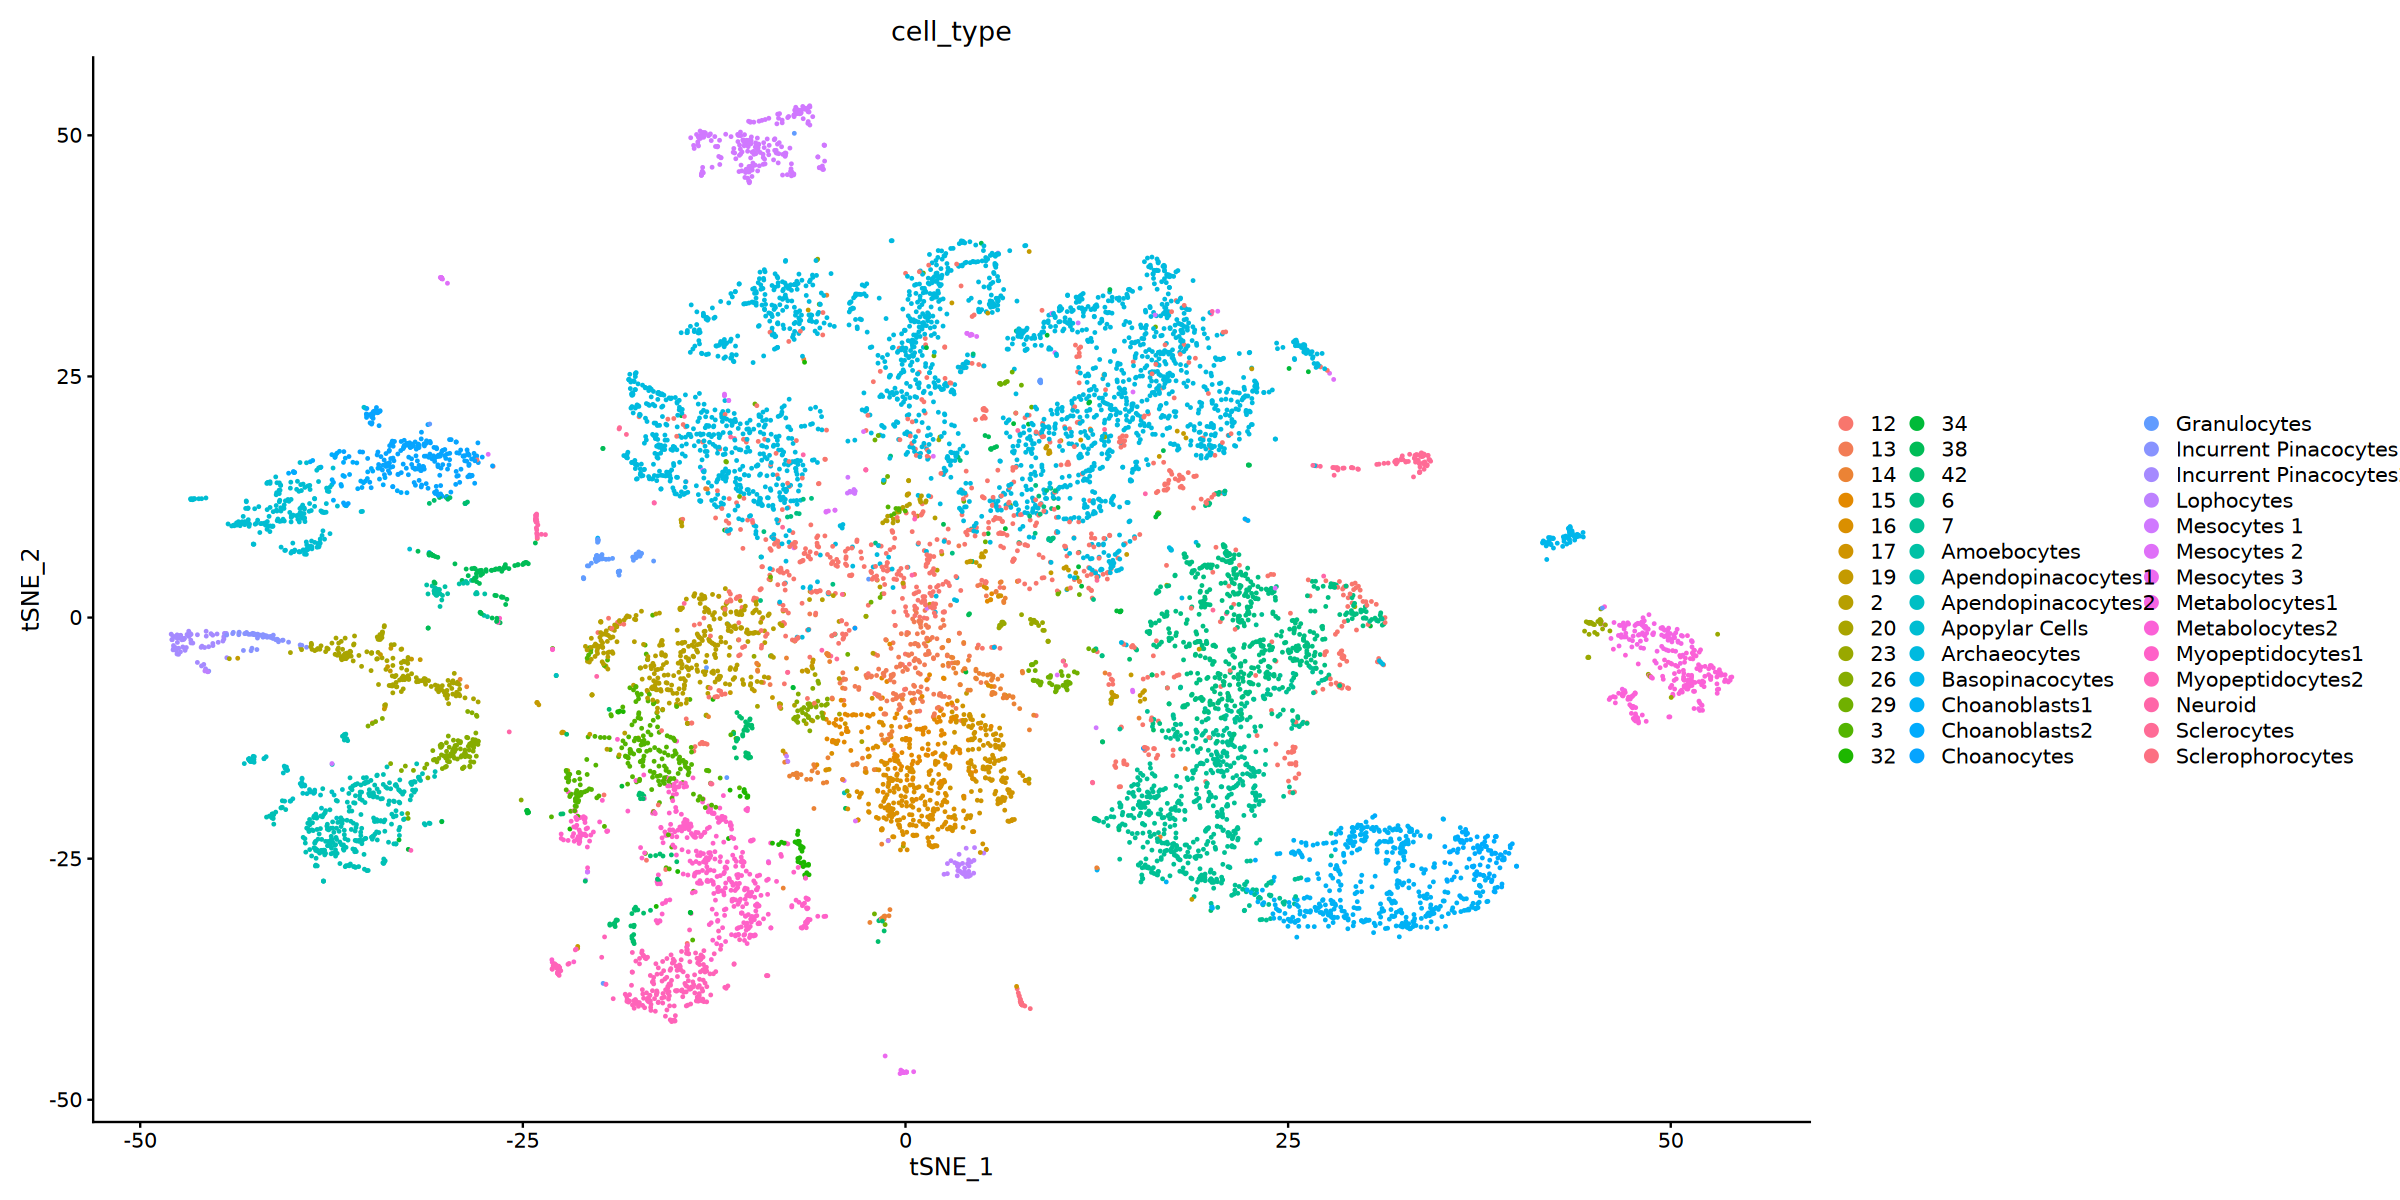

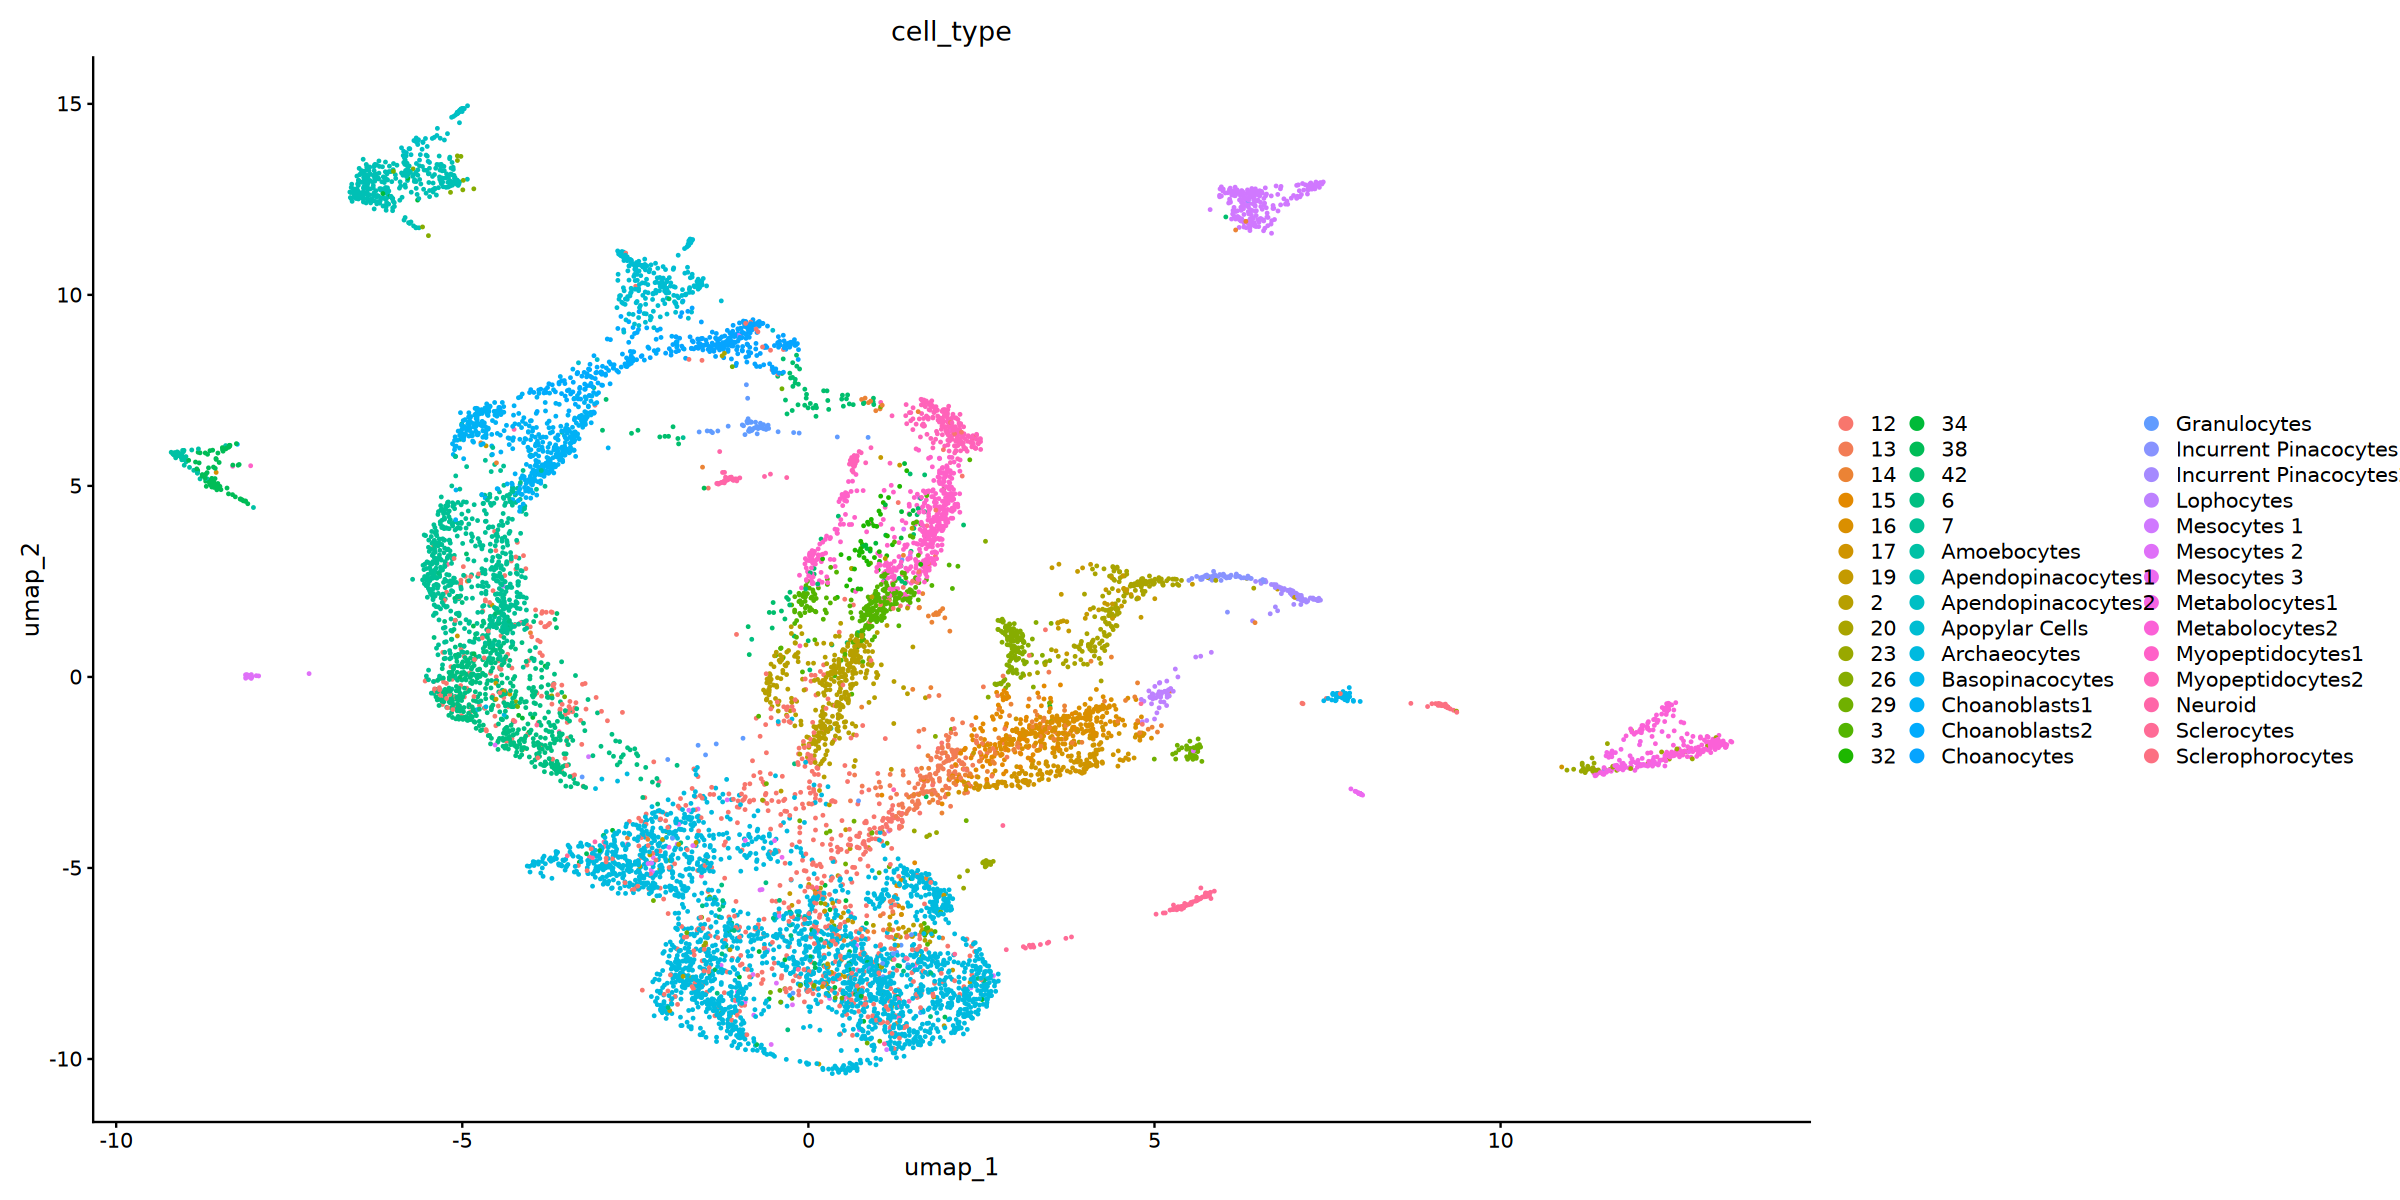

In [121]:
options(repr.plot.height=10, repr.plot.width=20)
to.plot <- c("cell_type")
DimPlot(sl, reduction = "pca", group.by=to.plot, dims = 1:2) 
DimPlot(sl, reduction = "tsne", group.by=to.plot) 
DimPlot(sl, reduction = "umap", group.by=to.plot) 

In [181]:
genes.of.interest <- FindAllMarkers(s1, group.by = "cell_type", only.pos=TRUE, min.pct=0.20, max.cells.per.ident=1000)
head(genes.of.interest,n=10)

Calculating cluster Archaeocytes



Calculating cluster 13

Calculating cluster Myopeptidocytes1

Calculating cluster 29

Calculating cluster 15

Calculating cluster Apopylar Cells

Calculating cluster Mesocytes 1

Calculating cluster 12

Calculating cluster Metabolocytes2

Calculating cluster 2

Calculating cluster 14

Calculating cluster Choanoblasts1

Calculating cluster Mesocytes 3

Calculating cluster Lophocytes

Calculating cluster 19

Calculating cluster 20

Calculating cluster Apendopinacocytes1

Calculating cluster 6

Calculating cluster 7

Calculating cluster 3

Calculating cluster Choanoblasts2

Calculating cluster Apendopinacocytes2

Calculating cluster 26

Calculating cluster Granulocytes

Calculating cluster 16

Calculating cluster Sclerocytes

Calculating cluster 23

Calculating cluster Myopeptidocytes2

Calculating cluster Basopinacocytes

Calculating cluster Mesocytes 2

Calculating cluster Choanocytes

Calculating cluster 32

Calculating cluster Metabolocytes1

Calculating cluster 42

Calculating cluste

p_val        
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        2.304393e-280
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           1.898571e-279
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          1.437945e-278
c91710-g1                                                                          9.485498e-277
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             2.055180e-263
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       8.029618e-262
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                3.960315e-260
c110616-g1 FBL (Fibrillarin) - emapper OG                                          4.086413e-260
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 2.091406e-257
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     5.525960e-257
                                                                                   avg_log2FC
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        3.102484  
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           3.069786  
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          2.808216  
c91710-g1                                                                          2.659591  
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             2.113732  
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       2.932854  
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                2.741548  
c110616-g1 FBL (Fibrillarin) - emapper OG                                          2.909469  
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 1.721019  
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     2.899836  
                                                                                   pct.1
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        0.997
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           0.990
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          0.994
c91710-g1                                                                          0.997
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             0.999
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       0.970
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                0.985
c110616-g1 FBL (Fibrillarin) - emapper OG                                          0.983
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 1.000
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     0.972
                                                                                   pct.2
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        0.599
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           0.435
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          0.456
c91710-g1                                                                          0.478
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             0.689
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       0.292
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                0.399
c110616-g1 FBL (Fibrillarin) - emapper OG                                          0.344
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 0.840
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     0.291
                        

In [182]:
head(genes.of.interest,n=10)

p_val        
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        2.304393e-280
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           1.898571e-279
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          1.437945e-278
c91710-g1                                                                          9.485498e-277
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             2.055180e-263
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       8.029618e-262
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                3.960315e-260
c110616-g1 FBL (Fibrillarin) - emapper OG                                          4.086413e-260
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 2.091406e-257
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     5.525960e-257
                                                                                   avg_log2FC
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        3.102484  
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           3.069786  
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          2.808216  
c91710-g1                                                                          2.659591  
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             2.113732  
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       2.932854  
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                2.741548  
c110616-g1 FBL (Fibrillarin) - emapper OG                                          2.909469  
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 1.721019  
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     2.899836  
                                                                                   pct.1
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        0.997
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           0.990
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          0.994
c91710-g1                                                                          0.997
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             0.999
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       0.970
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                0.985
c110616-g1 FBL (Fibrillarin) - emapper OG                                          0.983
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 1.000
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     0.972
                                                                                   pct.2
c99430-g2 GSTM4 (Glutathione S-transferase Mu) - emapper OG                        0.599
c93752-g1 (Inherit from NOG: Nucleophosmin nucleoplasmin 2) - emapper OG           0.435
c94782-g1 1-to-1 SNU13 small nuclear ribonucleoprotein 13                          0.456
c91710-g1                                                                          0.478
c90372-g1 PTGES3 (Prostaglandin E synthase 3 (Cytosolic)) - emapper OG             0.689
c43224-g1 1-to-1 NHP2 NHP2 ribonucleoprotein                                       0.292
c96953-g1 1-to-1 HSPD1 heat shock protein family D (Hsp60) member 1                0.399
c110616-g1 FBL (Fibrillarin) - emapper OG                                          0.344
c95043-g1 (nascent polypeptide-associated complex subunit alpha-like) - emapper OG 0.840
c91929-g1 1-to-1 NOP58 NOP58 ribonucleoprotein                                     0.291
                        

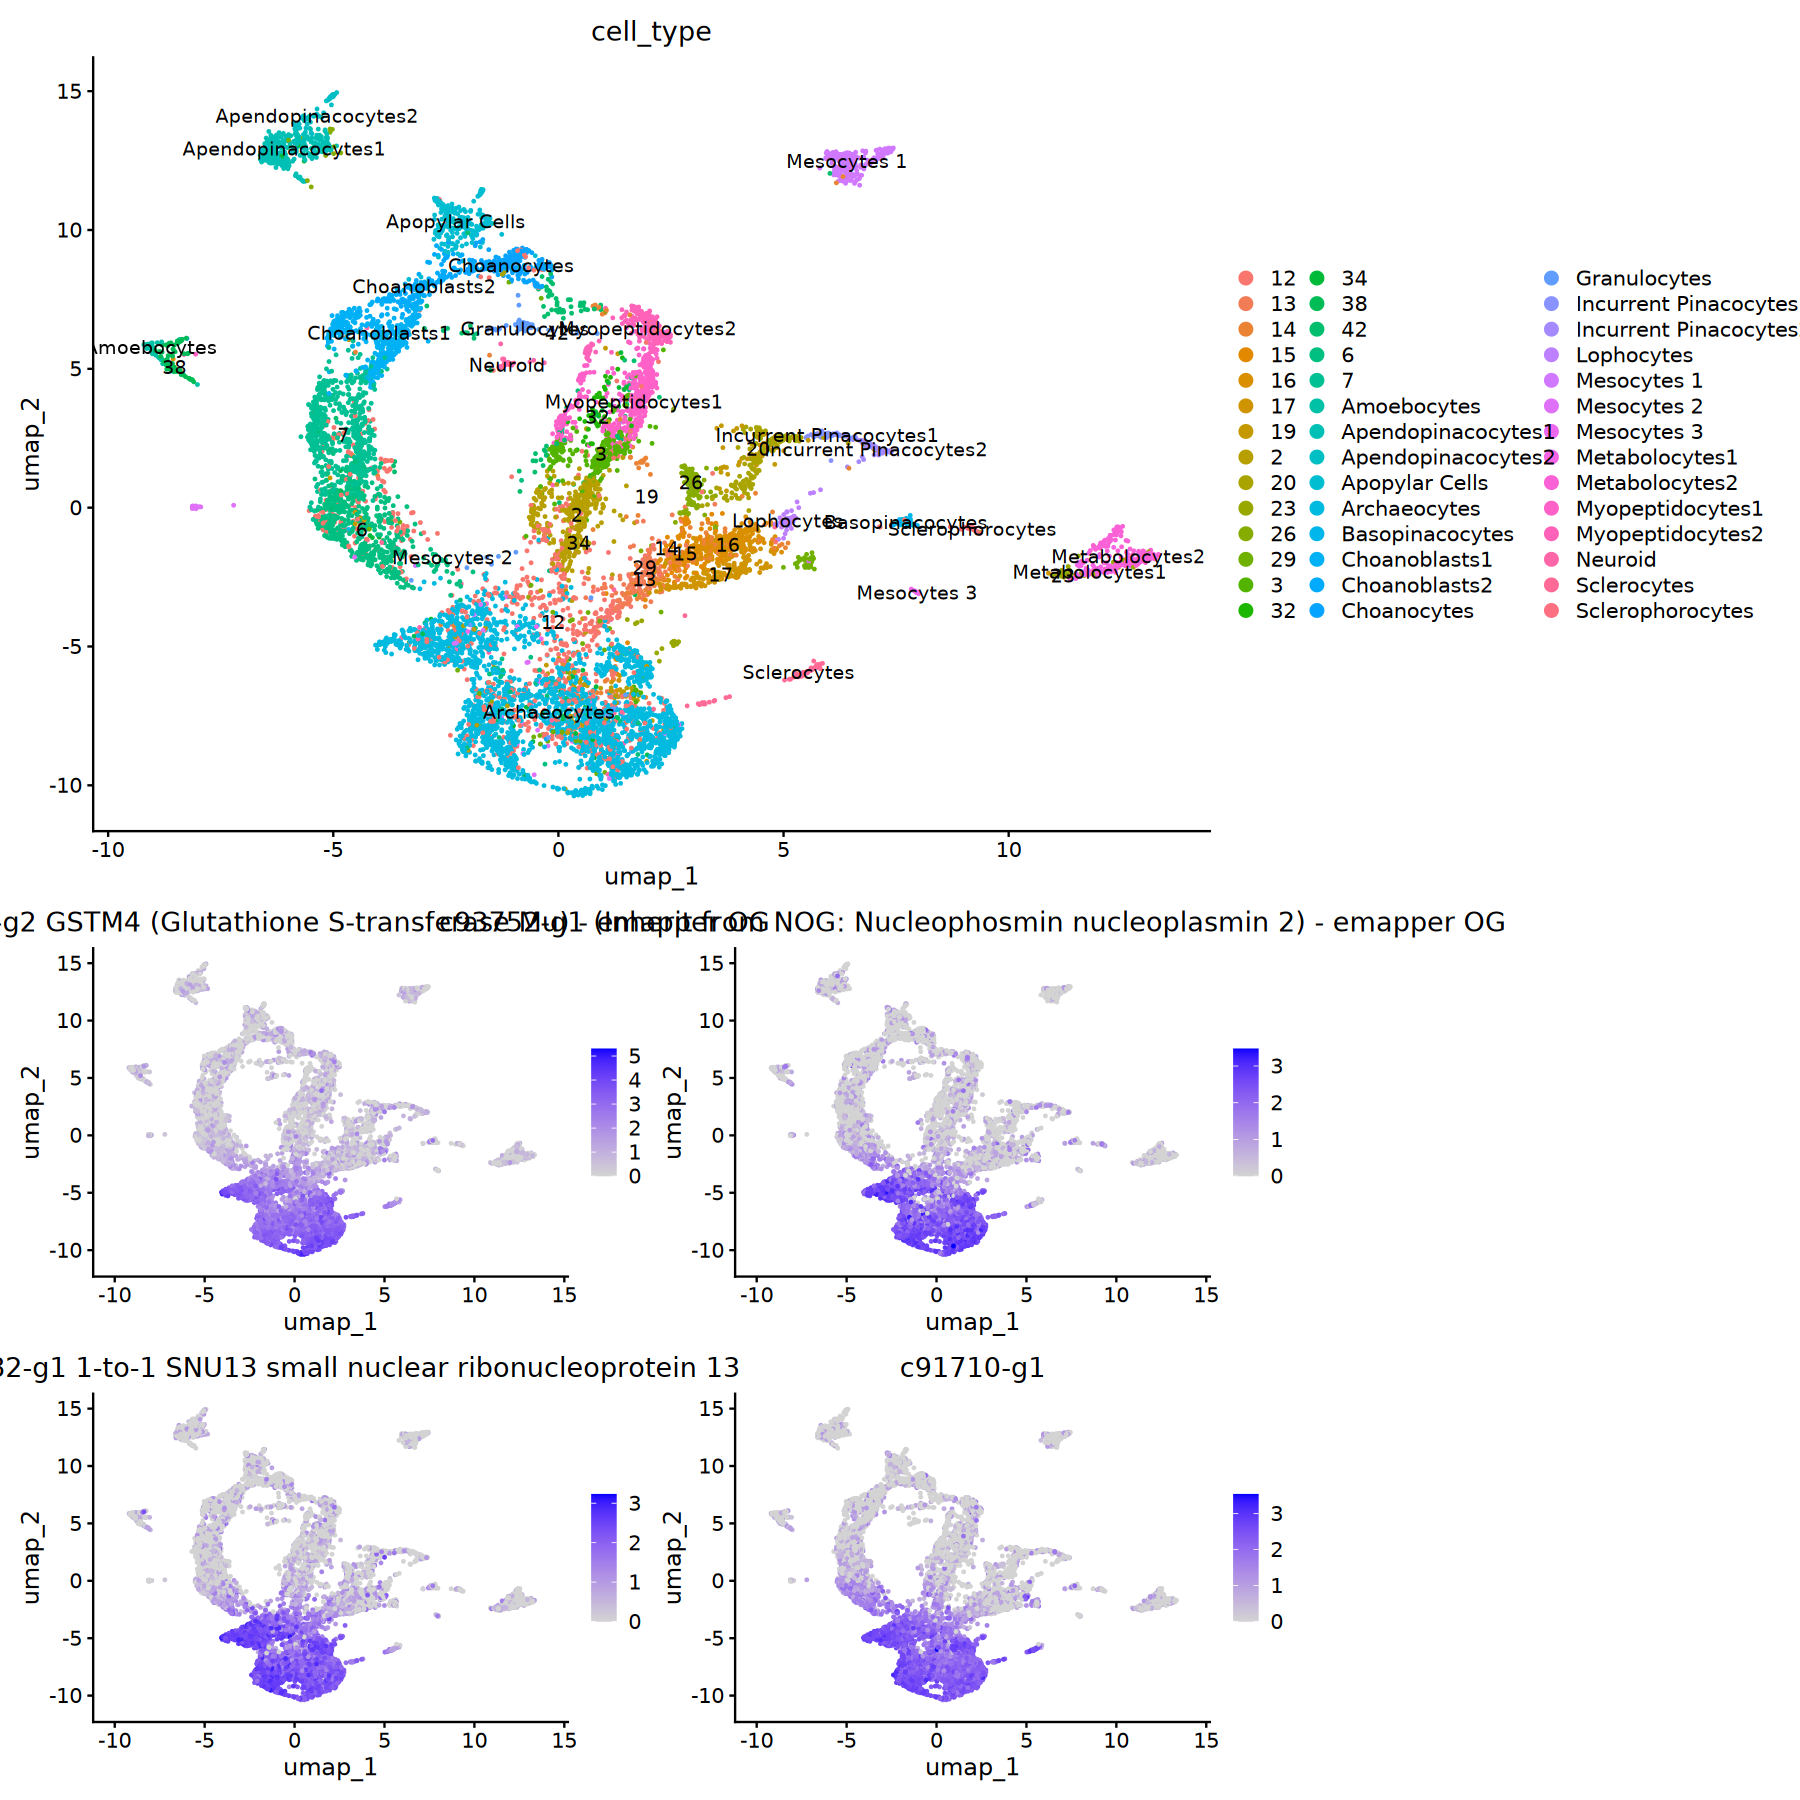

In [183]:
options(repr.plot.height=15, repr.plot.width=15)
DimPlot(sl, reduction = "umap", group.by="cell_type", label=TRUE) / FeaturePlot(sl, reduction = "umap", features =  rownames(genes.of.interest)[1:4])

In [186]:
library(dplyr)
top_n_per_cluster <- genes.of.interest %>%
  group_by(cluster) %>%      # Group the data by the 'cluster' column
  slice_head(n = 3) %>%      # Select the first 5 rows within each group
  ungroup()                  # Optional but good practice: remove the grouping

# View the result
print(top_n_per_cluster)

# A tibble: 126 × 7
       p_val avg_log2FC pct.1 pct.2 p_val_adj cluster          gene             
       <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>            <chr>            
 1 2.30e-280       3.10 0.997 0.599 6.03e-276 Archaeocytes     c99430-g2 GSTM4 …
 2 1.90e-279       3.07 0.99  0.435 4.97e-275 Archaeocytes     c93752-g1 (Inher…
 3 1.44e-278       2.81 0.994 0.456 3.76e-274 Archaeocytes     c94782-g1 1-to-1…
 4 1.05e- 86       2.72 0.92  0.233 2.74e- 82 13               c95494-g1        
 5 1.32e- 85       2.92 0.733 0.117 3.46e- 81 13               c102195-g1 5-to-…
 6 1.51e- 76       3.53 0.881 0.275 3.94e- 72 13               c104435-g1       
 7 5.21e-214       3.86 0.957 0.16  1.36e-209 Myopeptidocytes1 c70809-g1        
 8 1.12e-212       3.82 0.983 0.234 2.92e-208 Myopeptidocytes1 c102569-g3       
 9 6.20e-196       3.38 0.95  0.214 1.62e-191 Myopeptidocytes1 c100824-g2       
10 1.20e- 71       5.08 0.582 0.037 3.13e- 67 29               c101136-g1 2-to-…
# ℹ 116 

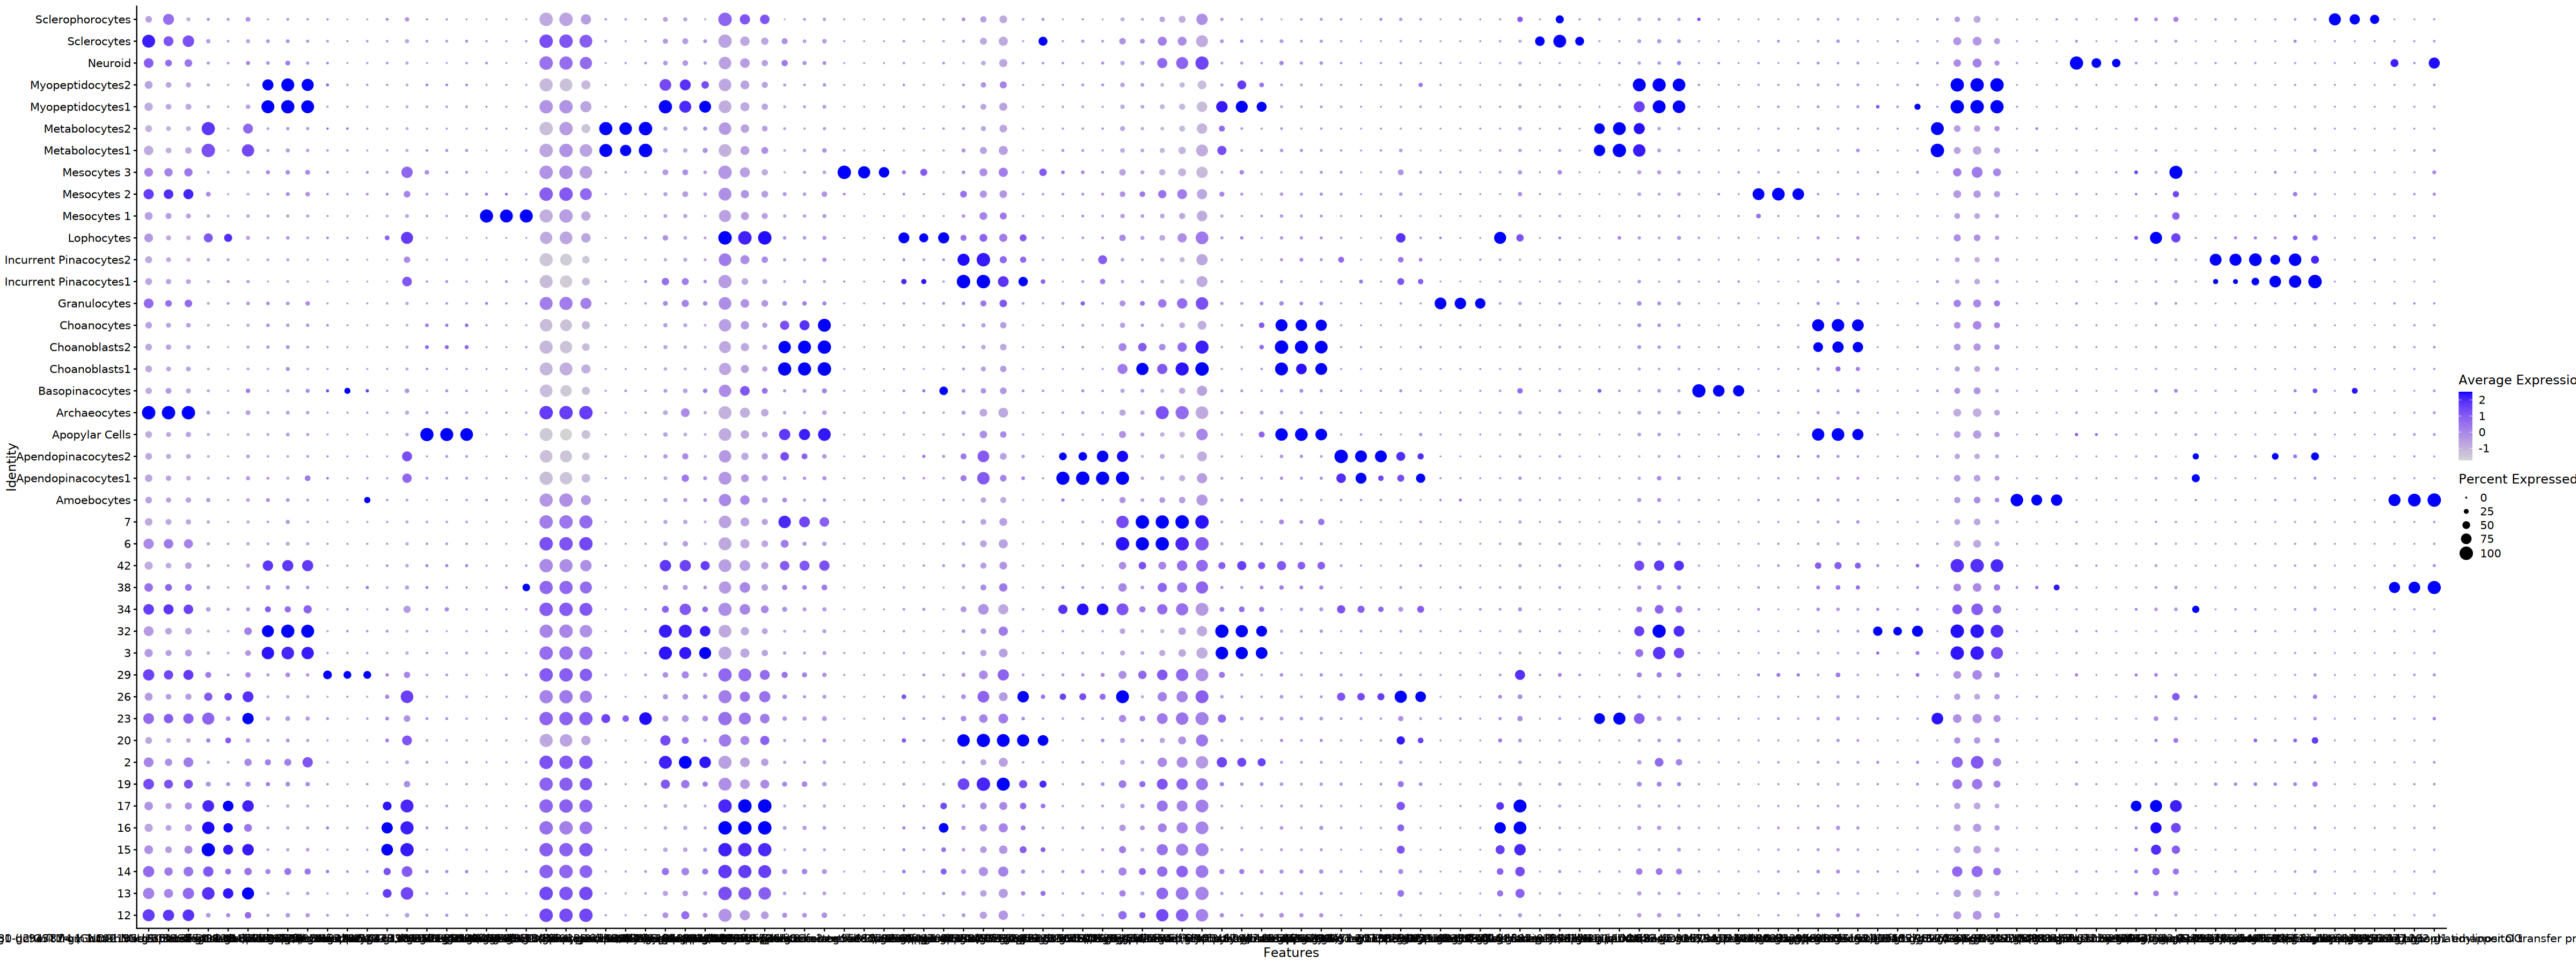

In [189]:
options(repr.plot.height=15, repr.plot.width=40)
DotPlot(sl, features =  unique(top_n_per_cluster$gene), group.by="cell_type")

In [173]:
pseudo_sl <- AggregateExpression(sl, assays = "RNA", return.seurat = F, group.by ="cell_type")[["RNA"]]
pseudo_sl <- pseudo_sl[rownames(sl) %in% VariableFeatures(sl),]
dim(pseudo_sl)

[1] 3000   42

In [177]:
# Calculate similarity matrix
dist_mat <- as.matrix(dist(t(pseudo_sl), method = "euclidean"))
similarity_from_dist <- 1 - (dist_mat / max(dist_mat))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9318  0.9638  0.9002  0.9786  1.0000 

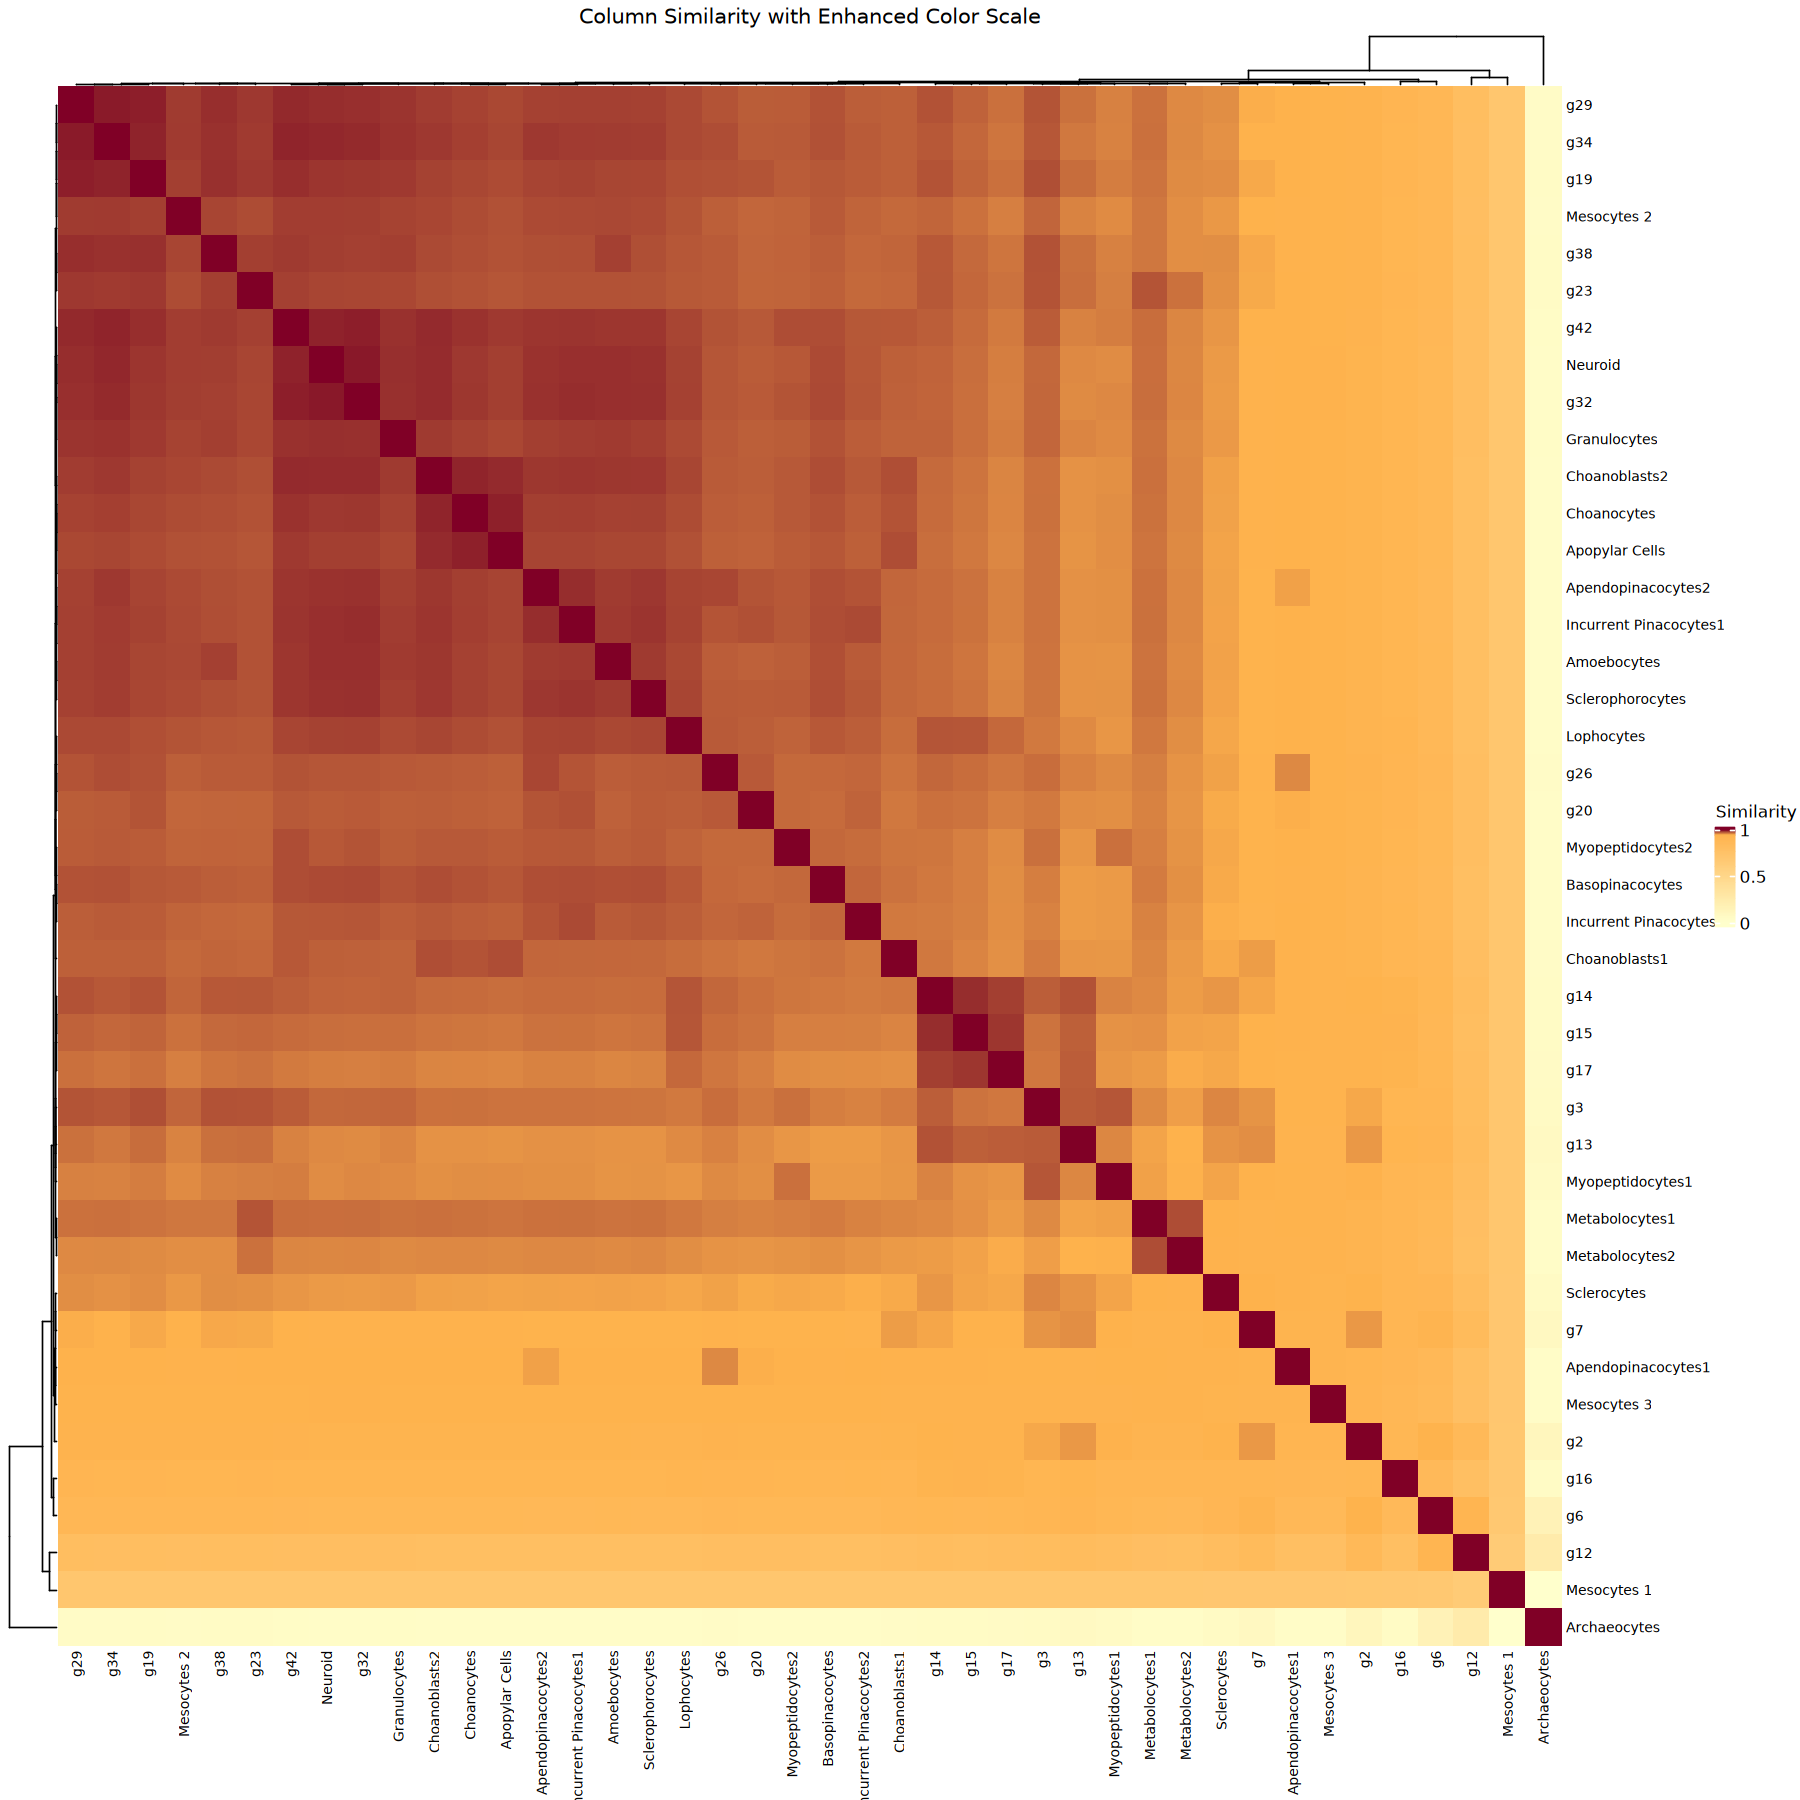

In [180]:
library(Matrix)
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)
# First, inspect the distribution of similarity scores
summary(as.vector(similarity_from_dist))
# You'll likely see that the 3rd Quartile and Max are very close.
# Let's say our values range from 0.75 to 1.0, with most > 0.9.

# Define the breaks. We want to stretch the color scale from 0.9 to 1.0.
# Let's set breaks at the minimum, 0.95, and the maximum (1.0).
min_val <- min(similarity_from_dist)
breaks <- c(min_val, 0.95, 1.0)

# Define a color palette. We'll go from a cool to a hot color.
# Using RColorBrewer gives nice, vetted palettes. "YlOrRd" is great for this.
colors <- brewer.pal(n = 9, name = "YlOrRd")
# Let's map our breaks to a light yellow, an orange, and a dark red.
my_colors <- c(colors[1], colors[4], colors[9])

# Create the color mapping function
my_color_ramp <- colorRamp2(breaks, my_colors)


# Now, plot with the new custom color scale
Heatmap(similarity_from_dist,
        name = "Similarity",

        # Use our custom color ramp!
        col = my_color_ramp,

        column_title = "Column Similarity with Enhanced Color Scale",
        column_title_gp = gpar(fontsize = 12, fontface = "bold"),
        row_names_gp = gpar(fontsize = 8),
        column_names_gp = gpar(fontsize = 8),

        # Keep clustering to see the groups
        show_row_dend = TRUE,
        show_column_dend = TRUE)